In [1]:
# pip install textract

In [12]:
# Import required libraries
import PyPDF2
import re
import string
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# # Import required libraries
# import PyPDF2
# import textract
# import re
# import string
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

# # Open pdf file
# pdfFileObj = open('resume\PU.pdf','rb')

# # Read file
# pdfReader = PyPDF2.PdfReader(pdfFileObj)

# # Get total number of pages
# num_pages = pdfReader.numPages

# # Initialize a count for the number of pages
# count = 0

# # Initialize a text empty etring variable
# text = ""

# # Extract text from every page on the file
# while count < num_pages:
#     pageObj = pdfReader.getPage(count)
#     count +=1
#     text += pageObj.extractText()

In [14]:
pdf = open('resume\PU.pdf', 'rb') #resume input

pdfReader = PyPDF2.PdfReader(pdf)

x= (len(pdfReader.pages))
print("Number of pages in the document:",x)

text = " "

for page_number in range(x):
    pdfReader = PyPDF2.PdfReader(pdf)
    if pdfReader.is_encrypted:
        pdfReader.decrypt('')
    page = pdfReader.pages[page_number]
    text += page.extract_text()
    
text

Number of pages in the document: 1


' CAREER  OBJECTIVE  \nTraining  and Certifications  \nJobs  and Responsibilities  \nCOMPUTER  SKILLS  \nACADEMIC  BACKGROUND  PRASHANT  UPADHYAY  \nPhone: +91  8954653528  \nEmail:  prashantupadhyay0@gmail.com  \nPrashant  is a career -oriented  professional  with decent  communication  and interpersonal  skills,  who knows  \nhow to make  sense  of data and translate  it into actionable  insights.  He is familiar  with gathering,  cleaning,  \nand organizing data for the use of technical and non -technical personnel. He is seeking a challenging  \nposition in a growth -oriented organization w here he can effectively contribute through his skills and  \nabilities.  \n \nCertifications:  \nInstitution:  Google  May,  2022  \nCertificate:  Google  Data  analytics  professional  certification  \n \nInstitution:  LinkedIn  Jul, 2021  \nCertificate:  Tableau  Essential  Training  (2020.1)  \nZummit Infolabs  Nov 2022  – Present  \nJr. Data  Scientist  \n\uf0b7 Writing  code  in Python , Te

In [15]:
pdfReader.metadata #About PDF

{'/Author': 'Prateek Kala',
 '/Creator': 'Microsoft® Word 2016',
 '/CreationDate': "D:20221205042833+00'00'",
 '/Producer': 'www.ilovepdf.com',
 '/ModDate': 'D:20221205042833Z'}

In [16]:
# Convert all strings to lowercase
text = text.lower()

# Remove numbers
text = re.sub(r'\d+','',text)

# Remove punctuation
text = text.translate(str.maketrans('','',string.punctuation))

In [27]:
# Create dictionary with industrial and system engineering key terms by area
terms = {'Quality/Six Sigma':['black belt','capability analysis','control charts','doe','dmaic','fishbone',
                              'gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
                              'pdsa','performance improvement','process improvement','quality',
                              'quality circles','quality tools','root cause','six sigma',
                              'stability analysis','statistical analysis','tqm'],      
        'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
         'Data Science':['analytics','CNN', 'MTCNN', 'Data Science', 'GAN', 'api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','machine learning','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system']}


In [28]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0
DataScience =0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Data Science':
        for word in terms[area]:
            if word in text:
                DataScience +=1
        scores.append(DataScience)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

In [29]:
# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data analytics,10
Data Science,9
Project management,2
Healthcare,2
Quality/Six Sigma,1
Operations management,1
Supply chain,0


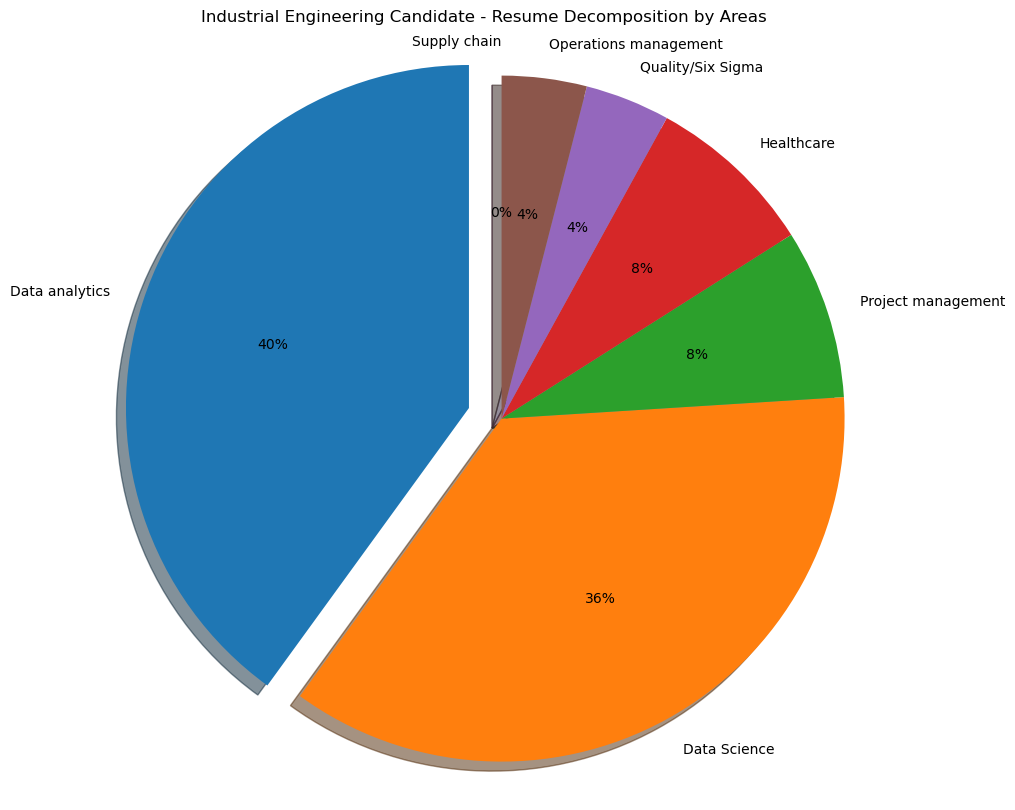

In [30]:
# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0.1,0,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
#pie.savefig('resume_screening_results.png')